In [ ]:
import tensorflow as tf
import numpy as np
print(tf.__version__)

2.2.0


In [ ]:
(train_x, train_y),(test_x,test_y) = tf.keras.datasets.mnist.load_data()

In [ ]:
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [ ]:
num_classes = 10
image_height = 28
image_width = 28
n_channels = 1

In [ ]:
train_x = train_x.reshape(train_x.shape[0], image_height, image_width, n_channels)
test_x = test_x.reshape(test_x.shape[0], image_height, image_width, n_channels)

In [ ]:
train_x = train_x.astype('float32') / 255.0
test_x = test_x.astype('float32') / 255.0

In [ ]:
train_x = np.pad(train_x, ((0,0), (2, 2), (2, 2),(0, 0)), 'constant')
test_x = np.pad(test_x, ((0,0), (2, 2), (2, 2),(0, 0)), 'constant')

In [ ]:
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(60000, 32, 32, 1)
(60000,)
(10000, 32, 32, 1)
(10000,)


In [ ]:
num_classes = 10
image_height = 32
image_width = 32
n_channels = 1

In [ ]:
from tensorflow.keras.layers import Conv2D, AveragePooling2D,Flatten,Dense
from tensorflow.keras.models import Sequential

model = Sequential([
      Conv2D(6, 5, padding = 'valid', activation = tf.nn.tanh, input_shape = (image_height, image_width,n_channels)),
      AveragePooling2D(pool_size = (2,2), strides = (2, 2)),
     
      Conv2D(16, 5, padding = 'valid', activation = tf.nn.tanh),
      AveragePooling2D(pool_size = (2,2), strides = (2, 2)),

      Flatten(),
      Dense(120, activation = tf.nn.tanh),
      Dense(84, activation = tf.nn.tanh),
      Dense(num_classes, activation = tf.nn.softmax)    
    ])

In [ ]:
model.compile(tf.keras.optimizers.SGD(learning_rate=0.01),
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 28, 28, 6)         156       
_________________________________________________________________
average_pooling2d_4 (Average (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
average_pooling2d_5 (Average (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 400)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 120)               48120     
_________________________________________________________________
dense_7 (Dense)              (None, 84)               

In [ ]:
class myCallBack(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs = None):
    if(logs.get('accuracy') > 0.99):
      print('Reached 99% accuracy so cancelling training')
      self.model.stop_training=True

In [ ]:
  batch_size = 128
  epochs = 150
  history = model.fit(x = train_x, y = train_y, validation_data = (test_x, test_y),
                      batch_size=batch_size, epochs = epochs, verbose=1, callbacks = [myCallBack()])

Epoch 1/150
469/469 [==============================] - 2s 4ms/step - loss: 2.3001 - accuracy: 0.1724 - val_loss: 2.2922 - val_accuracy: 0.2458
Epoch 2/150
469/469 [==============================] - 2s 3ms/step - loss: 2.2685 - accuracy: 0.2643 - val_loss: 2.2173 - val_accuracy: 0.2913
Epoch 3/150
469/469 [==============================] - 2s 3ms/step - loss: 2.1159 - accuracy: 0.4333 - val_loss: 1.9947 - val_accuracy: 0.6027
Epoch 4/150
469/469 [==============================] - 2s 3ms/step - loss: 1.9013 - accuracy: 0.6949 - val_loss: 1.8154 - val_accuracy: 0.7597
Epoch 5/150
469/469 [==============================] - 2s 4ms/step - loss: 1.7812 - accuracy: 0.7729 - val_loss: 1.7409 - val_accuracy: 0.7969
Epoch 6/150
469/469 [==============================] - 2s 3ms/step - loss: 1.7295 - accuracy: 0.7970 - val_loss: 1.7043 - val_accuracy: 0.8126
Epoch 7/150
469/469 [==============================] - 2s 3ms/step - loss: 1.7008 - accuracy: 0.8099 - val_loss: 1.6819 - val_accuracy: 0.8224

Text(0.5, 1.0, 'Training and Validation Accuracy')

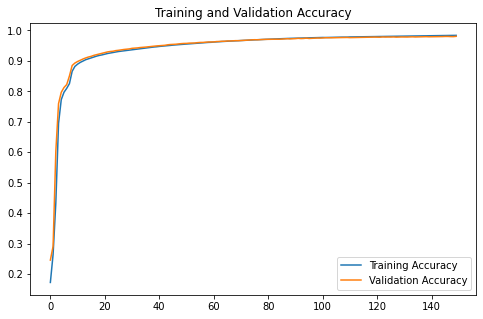

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(epochs)
plt.figure(figsize=(8, 5))
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

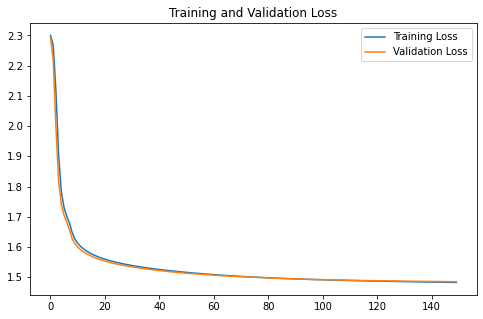

In [ ]:
plt.figure(figsize=(8, 5))
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
(loss, accuracy) = model.evaluate(test_x, test_y,
                                  batch_size = batch_size, verbose = 1)
print('Accuracy is {:.2f}%'.format(accuracy*100))

79/79 [==============================] - 0s 2ms/step - loss: 1.4849 - accuracy: 0.9808
Accuracy is 98.08%
